## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

### Solutions
---

In [15]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline

In [183]:
N = 20
eps = np.random.normal(loc=0, scale=0.1, size=(N, 1))
x_values = np.random.random((N, 1)) * 2 * np.pi
y_values = np.sin(x_values) + eps
X_train = np.concatenate((x_values, np.ones((N, 1))), axis=1)
Y_train = y_values
w = nla.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)

Let us plot data and model's prediction:


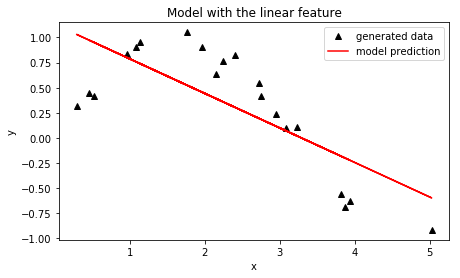

In [184]:
plt.figure(figsize=(7, 4))
plt.title('Model with the linear feature')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_values, y_values, 'k^', label='generated data')
plt.plot(x_values, X_train.dot(w), 'r', label='model prediction')
plt.legend(loc='best')

Clearly, our model is far from perfect. Let's add polynomial features and plot the new advanced model:

In [145]:
def MakePolyMatrix(x_data, degree):
    x_matrix = x_data
    for i in range(2, degree + 1):
        x_matrix = np.concatenate((x_matrix, x_data**i), axis=1)
    x_matrix = np.concatenate((x_matrix, np.ones((x_data.shape[0], 1))), axis=1)
    return x_matrix

In [185]:
X_train_adv = MakePolyMatrix(x_values, 3)
w_adv = nla.inv(X_train_adv.T.dot(X_train_adv)).dot(X_train_adv.T).dot(Y_train)

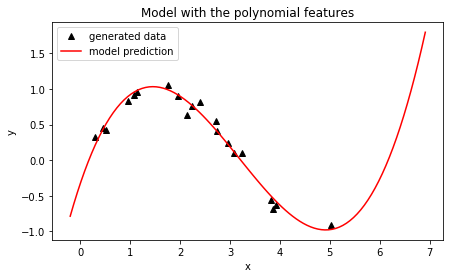

In [198]:
def f_adv(x, coef):
    coef_ = coef.reshape((coef.shape[0]))
    i = 0
    y = 0
    while i < coef_.size - 1:
        y += coef_[i] * x**(i + 1)
        i += 1
    y += coef_[i]
    return y
    
plt.figure(figsize=(7, 4))
plt.title('Model with the polynomial features')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_values, y_values, 'k^', label='generated data')
# the following lists are used in order to omit sorting initial points
x_space = np.linspace(-0.2, 2.2 * np.pi, 100)
y_space = [f_adv(x, w_adv) for x in x_space]
plt.plot(x_space, y_space, 'r', label='model prediction')
plt.legend(loc='best')

As can be seen from the plot, such a model provides much better solution in comparison with a primitive one.
Let's see, what happens when a lot more feautures are added.

In [187]:
X_adv_plus = MakePolyMatrix(x_values, 7)
w_adv_plus = nla.inv(X_adv_plus.T.dot(X_adv_plus)).dot(X_adv_plus.T).dot(Y_train)

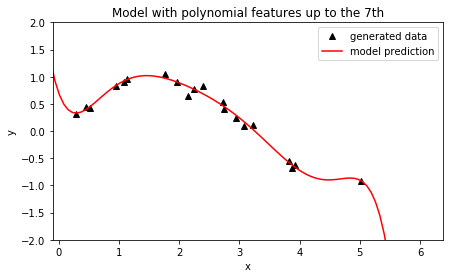

In [199]:
plt.figure(figsize=(7, 4))
plt.title('Model with polynomial features up to the 7th')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_values, y_values, 'k^', label='generated data')
y_space = [f_adv(x, w_adv_plus) for x in x_space]
plt.plot(x_space, y_space, 'r', label='model prediction')
plt.axis((0 - 0.1, 2*np.pi + 0.1, -2, 2))
plt.legend(loc='best')

At first sight, this model predicts the function even better. However, extending the list of features might lead to overfitting (we see the unnatural behaviour at the ends of the interval $[0, 2\pi]$) and result in huge errors on test (or validation) datasets. Let's show that.

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

### Solutions
---

Let's generate validation samples and plot them along with the previously generated train ones.

In [190]:
eps = np.random.normal(loc=0, scale=0.1, size=(N, 1))
x_valid = np.random.random((N, 1)) * 2 * np.pi
y_valid = np.sin(x_valid) + eps

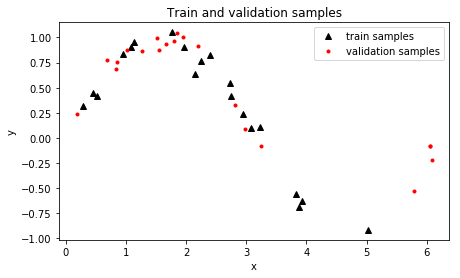

In [191]:
plt.figure(figsize=(7, 4))
plt.title('Train and validation samples')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_values, y_values, 'k^', label='train samples')
plt.plot(x_valid, y_valid, 'r.', label='validation samples')
plt.legend(loc='best')

Let's check quality of model with poly features: $x^2, x^3$.

In [200]:
def MSE(model, x_matrix_data, y_matrix_data):
    squared_error = (x_matrix_data.dot(model) - y_matrix_data)**2
    squared_error = squared_error.reshape(squared_error.shape[0])
    mean_error = squared_error.sum(axis=0) / squared_error.shape[0]
    return mean_error

print("MSE on train dataset:", MSE(w_adv, X_train_adv, Y_train))
print("MSE on validation dataset:", MSE(w_adv, MakePolyMatrix(x_valid, 3), y_valid))

MSE on train dataset: 0.00776826170198
MSE on validation dataset: 0.0105583576393


The error appears to be quite small and approximately the same on both datasets. Let's check what happens with "super advanced" model with poly features up to the $x^7$ and whether it's overfitted or not.

In [201]:
print("MSE on train dataset:", MSE(w_adv_plus, X_adv_plus, Y_train))
print("MSE on validation dataset:", MSE(w_adv_plus, MakePolyMatrix(x_valid, 7), y_valid))

MSE on train dataset: 0.00454605974852
MSE on validation dataset: 28.569069727


And there it is, overfitting appears. It's easy to notice the reason for that: some validation samples are located beyond the interval which holds the training dataset: those three points close to $2\pi$. As we have already seen, the predicted function goes overwhelmingly downward, which leads to such a big error. Apart from the big value, it means that our model is too complicated and in need of adjustment. 

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(w^Tx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

### Solutions
---

#### 1.
The conditional probability that label is "1" if the object is x is the following:
$$\mathbb{P}\{y=1 \mid x\} = \frac{1}{1 + e^{-w^Tx}}$$

Thus, the probability that the object has label "-1" is:
$$\mathbb{P}\{y= -1\mid x\} = 1 - \frac{1}{1 + e^{-w^Tx}} = \frac{e^{-w^Tx}}{1 + e^{-w^Tx}} = \frac{1}{e^{w^Tx}+1}$$

Now, let's define the likelihood function as $\mathbb{L}(w, X^l) = \mathbb{P}(y_1 = y_{t_1}, \dots, y_l = y_{t_l} \mid x_1, \dots, x_l)$, where $y_{t_i}$ is the true label of i-th object.

Since all the samples in train dataset are independent from each other, we can rewrite it as
$$\mathbb{L}(w, X^l) = \prod_{i=1}^l{\mathbb{P}(y_i = y_{i_t} \mid x_i)} = \prod_{i: y_i = 1}{\mathbb{P}(y_i = 1\mid x_i)} \prod_{i: y_i = -1}{\mathbb{P}(y_i = -1\mid x_i)}$$

Because the logarithm is a monotonically increasing function, the logarithm of a function achieves its maximum value at the same points as the function itself, so let's turn to $\ln{\mathbb{L}(w, X^l)}$:

$$\ln{\mathbb{L}(w, X^l)} = \ln \prod_{i: y_i = 1}{\mathbb{P}(y_i = 1\mid x_i)} + \ln \prod_{i: y_i = -1}{\mathbb{P}(y_i = -1\mid x_i)} = $$

$$ = \sum_{i: y_i = 1}{\ln \mathbb{P}(y_i = 1\mid x_i)} + \sum_{i: y_i = -1}{\ln \mathbb{P}(y_i = -1\mid x_i)} $$

Now, it's clear that the maximization of $\ln{\mathbb{L}(w, X^l)}$ is the same as the minimazition of $-\ln{\mathbb{L}(w, X^l)}$, so we turn to the last problem. Since $\ln \frac{1}{1 + t} = -\ln (1+t)$, we have the following:

$$-\ln{\mathbb{L}(w, X^l)} = \sum_{i: y_i = 1}{\ln (1 + e^{-w^Tx})} + \sum_{i: y_i = -1}{\ln (1 + e^{w^Tx})} = \sum_{i}{\ln (1 + e^{-yw^Tx})} $$

Which shows, that in order to maximize $\mathbb{P}\{y=1 \mid x\}$ we need to find $w$ such that it minimizes $\sum_{i}{\ln (1 + e^{-yw^Tx})}$, therefore to solve the problem

$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$

#### 2.
Since $M = yw^Tx$ we can rewrite the loss functions in the following way:

 $$MSE: L = (M-1)^2$$
 $$Hinge: L = max (0, 1-M)$$
 $$Log loss: L = \ln (1+e^{-M})$$

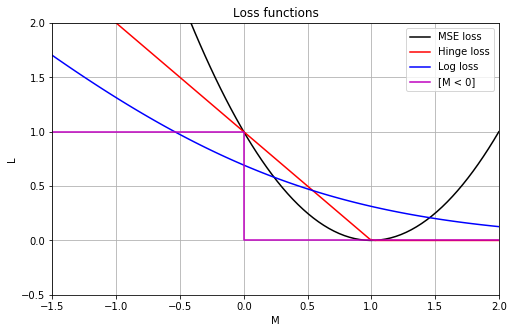

In [26]:
x_space = np.linspace(-2, 2, 100)
mse_loss = [(x - 1)**2 for x in x_space]
hinge_loss = [max(0, 1-x) for x in x_space]
log_loss = [np.log(1 + np.exp(-x)) for x in x_space]
x_basic = [-2, 0, 0, 2]
basic_loss = [1, 1, 0, 0]

plt.figure(figsize=(8, 5))
plt.axis((-1.5, 2, -0.5, 2))
plt.grid(True)
plt.title('Loss functions')
plt.xlabel('M')
plt.ylabel('L')
plt.plot()
plt.plot(x_space, mse_loss, 'k', label='MSE loss')
plt.plot(x_space, hinge_loss, 'r', label='Hinge loss')
plt.plot(x_space, log_loss, 'b', label='Log loss')
plt.plot(x_basic, basic_loss, 'm', label='[M < 0]')
plt.legend(loc='best')
plt.show()

#### 3.
Let's try to use MSE loss function and already known analytical solution so as to train classifier.
Firstly, we will generate two sets of points, normally distibuted.

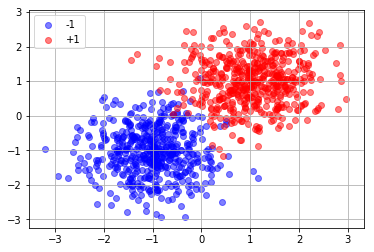

In [75]:
set_size = 500
mean_blue = np.array([-1, -1])
mean_red = np.array([1, 1])
cov_array = np.array([[0.5, 0], [0, 0.5]])
blue_points = np.random.multivariate_normal(mean=mean_blue, cov=cov_array, size=set_size)
red_points = np.random.multivariate_normal(mean=mean_red, cov=cov_array, size=set_size)
plt.grid(True)
plt.scatter(blue_points[:,0], blue_points[:, 1], c='b', alpha=0.5, label='-1')
plt.scatter(red_points[:, 0], red_points[:, 1], c='r', alpha=0.5, label='+1')
plt.legend(loc='best')
plt.show()

Let's construct matrix $X$, which represents two features of every point: $x$- and $y$- coordinate and matrix $Y$, which shows the class each point belongs to.

In [76]:
X_train = np.concatenate((red_points, blue_points), axis=0)
X_train = np.concatenate((X_train, np.ones((2 * set_size, 1))), axis=1)
Y_train = np.concatenate((np.ones((set_size, 1)), -np.ones((set_size, 1))), axis=0)
w = nla.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
print(w)

[[ 0.40020973]
 [ 0.39445343]
 [ 0.01137491]]


As we know, $w$ contains the coordinates of normal vector to the separating hyperplane and coefficient $b$. So we can construct the plane itself (in our example it will be the line).
$$w^Tx = 0$$
$$w_0x_0 + w_1x_1 + w_2 = 0$$
$$x_1 = -\frac{w_2}{w_1} -\frac{w_0}{w_1}x_0$$

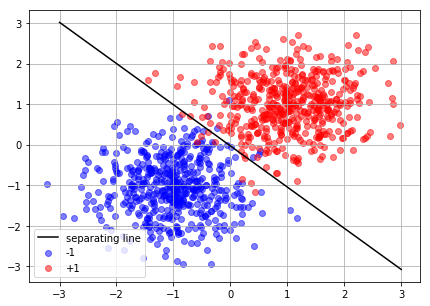

In [77]:
def Yvalue(normal, x):
    c = normal[2] / normal[1]
    b = normal[0] / normal[1]
    return - c - b * x

x_line = np.linspace(-3, 3, 100)
y_line = [Yvalue(w, x) for x in x_line]

plt.figure(figsize=(7, 5))
plt.grid(True)
plt.scatter(blue_points[:,0], blue_points[:, 1], c='b', alpha=0.5, label='-1')
plt.scatter(red_points[:, 0], red_points[:, 1], c='r', alpha=0.5, label='+1')
plt.plot(x_line, y_line, 'k', label = 'separating line')
plt.legend(loc='best')
plt.show()

#### 7.
Let's calculate the complexity of our solution. Recall that all we have to do is to find $w$ in the following way:
$$w = (X^TX)^{-1}X^TY$$, where $X$ has a shape of $(l, n + 1)$ and $Y$ - $(l, 1)$, $n$ is the dimension of space.

$X^T$ is computed in $O(l(n+1))$ time. The multiplication $X^TX$ takes $O((n+1)^2l) = O(n^2l)$. Computation of the inverse of $X^TX$ requires $O(n^3)$ time. The subsequent multiplication $(X^TX)^{-1}X^T$ takes $O(l(n+1) \times (n+1))$. And the last product is computed in $O(l(n+1))$.

Thus, we can compute the time complexity of the solution:
$$O(ln+l) + O(ln^2) + O(n^3)+ O(ln^2+ln) + O(ln+l) = O(n^3) + O(ln^2) = O(n^3 + ln^2)$$

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

### Solutions
---
Let's take the following function: 
$$f(x, y) = 3x^2+xy+2y^2-x-4y$$
though it isn't obvious, this function has a global minimum of -2 at $(x, y) = (0, 1)$. Let's have a look at the plot itself.

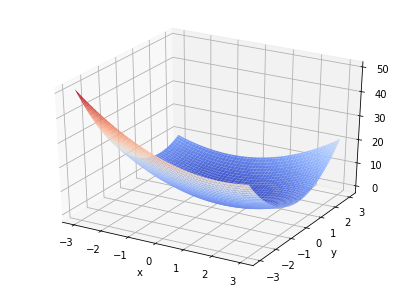

In [337]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + X*Y + 2*Y**2 - X - 4*Y
plt.xlabel('x')
plt.ylabel('y')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

Now we are ready to find the minimum (basically, the local one, which luckily coincides with the global one) with the help of gradient descent.

Let's find the gradient vector in some point $(x, y)$:
$$\triangledown f(x, y) = \begin{pmatrix}
6x+y-1\\
x+4y-4
\end{pmatrix}$$

In [338]:
def FindGradient(point2D):
    x = point2D[0]
    y = point2D[1]
    x_derivative = 6 * x + y - 1
    y_derivative = x + 4*y - 4
    return [x_derivative, y_derivative]

In [339]:
def FunctionValue(point2D):
    x = point2D[0]
    y = point2D[1]
    return 3*x**2 + x*y + 2*y**2 - x - 4*y

In [340]:
def GradientDescent(init_point, value_func, gradient_func, lambda_,
                    max_iter_num=-1, loss_eps=1e-9):
    cur_point = init_point
    cur_value = FunctionValue(init_point)
    extremum_found = False
    path = []
    while not extremum_found and max_iter_num != 0:
        path.append(cur_point)
        x_deriv, y_deriv = gradient_func(cur_point)
        x_new = cur_point[0] - lambda_ * x_deriv
        y_new = cur_point[1] - lambda_ * y_deriv
        new_point = [x_new, y_new]
        if (abs(FunctionValue(new_point) - value_func(cur_point)) < loss_eps):
            extremum_found = True
            break
        cur_point = new_point
        if max_iter_num > 0:
            max_iter_num -= 1
    return cur_point, np.array(path)

In [341]:
extremum, route = GradientDescent([-3, -3], FunctionValue,
                                  FindGradient, 0.05)
print(extremum)

[1.525978966832097e-05, 0.9999631551835877]


As we can see, the point found by `GradientDescent` doesn't differ much from $(0, 1)$. Let's plot contour lines and trace the descent path.

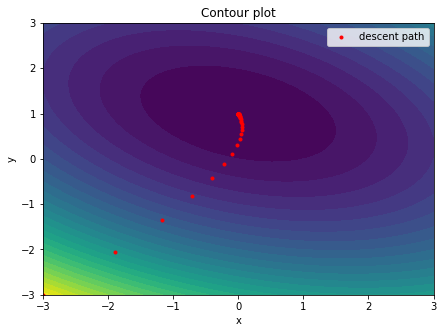

In [342]:
fig = plt.figure(figsize=(7, 5))
plt.title('Contour plot')
plt.contourf(X, Y, Z, 30)
plt.plot(route[:, 0], route[:, 1], 'ro', ms=3, label='descent path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

#### 5.
The choice of $\lambda$ may be based on some figures while experimenting:

In [343]:
# warning: the following code goes to infinite loop
# extremum1, route1 = GradientDescent([-3, -3], FunctionValue,
#                                  FindGradient, 1)
extremum1, route1 = GradientDescent([-3, -3], FunctionValue,
                                 FindGradient, 1, max_iter_num=1000)
print(route1[:10])

[[-3 -3]
 [19 16]
 [-110 -63]
 [614 303]
 [-3372 -1519]
 [18380 7933]
 [-99832 -42175]
 [541336 226361]
 [-2933040 -1220415]
 [15885616 6594289]]


It is clear that when $\lambda \geq 1$ the algorithm doesn't converge: on each step the function value only increases. When setting $\lambda$ to rather small value, the iteration number increases significantly: 

In [344]:
extremum2, route2 = GradientDescent([-3, -3], FunctionValue,
                                 FindGradient, 0.00001)
print('Steps number:', route2.shape[0])

Steps number: 190119


So the possible approach could be bounding the maximum iteration limit to around 2000-3000 and choosing $\lambda \approx 0.1-0.01$. 

In [345]:
extremum3, route3 = GradientDescent([-3, -3], FunctionValue,
                                 FindGradient, 0.01, max_iter_num=3000)
print(extremum3)
print('Steps number:', route3.shape[0])

[3.283435104882231e-05, 0.9999206453461945]
Steps number: 283


#### 6.
TO BE DONE: evaluate time complexity

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

### Solutions
---

Let's firstly plot the function itself:

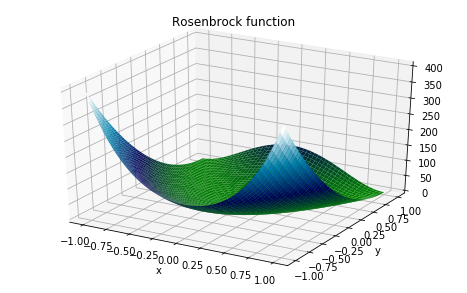

In [346]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(X, Y)
Z = (1 - X)**2 + 100*(Y - X**2)**2
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rosenbrock function')
surf = ax.plot_surface(X, Y, Z, cmap=cm.ocean, antialiased=True)

Let's find the gradient vector in some point $(x, y)$:
$$\triangledown f(x, y) = \begin{pmatrix}
2(x-1)+400(x^2-y)x\\
200(y-x^2)
\end{pmatrix}$$

In [347]:
def RosenbrockGradient(point2D):
    x = point2D[0]
    y = point2D[1]
    x_derivative = 2*(x - 1) + 400*(x**2 - y)*x
    y_derivative = 200*(y - x**2)
    return [x_derivative, y_derivative]

In [348]:
def RosenbrockValue(point2D):
    x = point2D[0]
    y = point2D[1]
    return (1 - x)**2 + 100*(y - x**2)**2

In [349]:
def InitRandomPoint(boundary):
    return np.random.uniform(-boundary, boundary, 2)

In [360]:
random_point = InitRandomPoint(1)
extremum, route = GradientDescent(random_point,
                                  RosenbrockValue, RosenbrockGradient,
                                  0.001, max_iter_num=100000)
print(extremum)
print('Iterations number:', route.shape[0])

[0.99999999999992795, 0.99999999999985567]
Iterations number: 100000


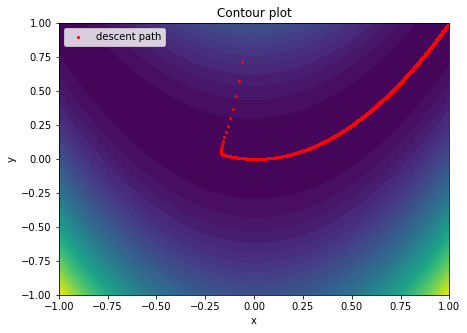

In [363]:
fig = plt.figure(figsize=(7, 5))
plt.title('Contour plot')
plt.contourf(X, Y, Z, 40)
plt.plot(route[:, 0], route[:, 1], 'ro', ms=2, label='descent path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

By plotting contour lines we can see the problem. On its very first steps the algorithm goes at right angle to the contour line. But then something strange happens...(to be continued)

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)